In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.errors import ShapelyDeprecationWarning
import warnings
plt.rcParams['figure.figsize'] = [12, 12]  # add more space to figures

In [4]:
vtds = gpd.read_file('geo/MI_VTDs_2020/MI_VTDs_2020.shp')

<AxesSubplot:>

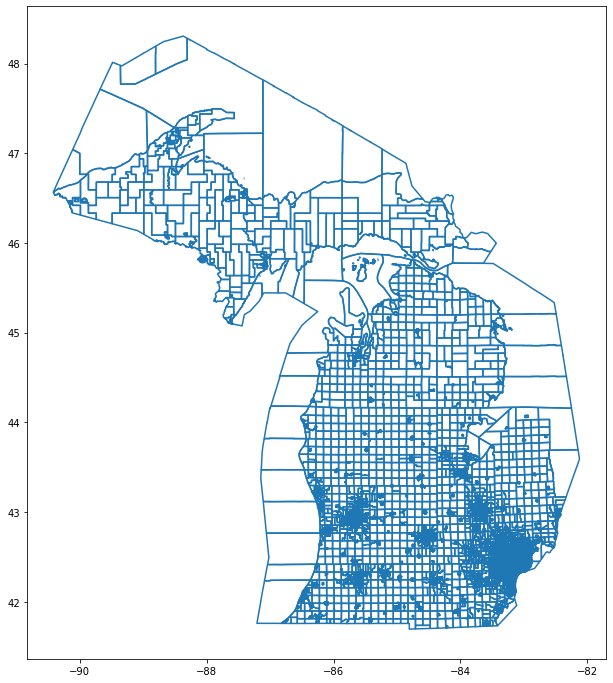

In [10]:
vtds.boundary.plot()

In [9]:
vtds

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,26,003,003001,26003003001,A,0030446000001,Voting District 0030446000001,V1,G5240,N,366843585,43425964,+46.3380932,-086.7739238,"MULTIPOLYGON (((-86.72267 46.48484, -86.72254 ..."
1,26,003,003007,26003003007,A,0035622000001,Voting District 0035622000001,V1,G5240,N,523821819,40068222,+46.4024760,-086.5105746,"POLYGON ((-86.67879 46.38334, -86.67877 46.383..."
2,26,003,003010,26003003010,A,0036916000001,Voting District 0036916000001,V1,G5240,N,208983301,652387,+46.3468839,-086.9948981,"POLYGON ((-87.11651 46.39118, -87.10728 46.391..."
3,26,003,003005,26003003005,A,0035236000001,Voting District 0035236000001,V1,G5240,N,183058104,3482479,+46.2149640,-086.8698593,"POLYGON ((-86.99081 46.23156, -86.99077 46.235..."
4,26,003,003009,26003003009,A,0036082000001,Voting District 0036082000001,V1,G5240,N,227225602,41073935,+46.4536416,-086.9688367,"POLYGON ((-87.11662 46.49507, -87.11651 46.499..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,26,159,159030,26159159030,A,1597498003001,Voting District 1597498003001,V1,G5240,N,2389384,239250,+42.4100351,-086.2719092,"POLYGON ((-86.28833 42.40196, -86.28440 42.402..."
4801,26,159,159032,26159159032,A,1597500000002,Voting District 1597500000002,V1,G5240,N,14825524,49380,+42.3503387,-086.2867211,"POLYGON ((-86.31115 42.33167, -86.31076 42.332..."
4802,26,159,159019,26159159019,A,1593696000001,Voting District 1593696000001,V1,G5240,N,3519795,12686,+42.2049586,-086.1661221,"POLYGON ((-86.17657 42.21501, -86.16929 42.215..."
4803,26,159,159002,26159159002,A,1590160000002,Voting District 1590160000002,V1,G5240,N,37663589,670801,+42.3010102,-085.8127518,"MULTIPOLYGON (((-85.82390 42.24556, -85.82384 ..."


In [11]:
tracts = gpd.read_file('geo/MI_Tracts_2018/MI_Tracts_2018.shp')

<AxesSubplot:>

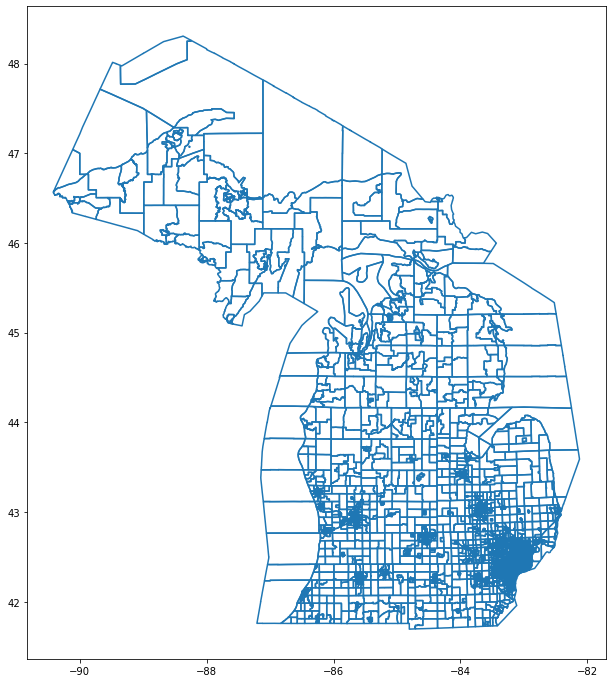

In [12]:
tracts.boundary.plot()

In [13]:
tracts

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,26,081,014701,26081014701,147.01,Census Tract 147.01,G5020,S,3476917,26945,+42.8412855,-085.6702447,"POLYGON ((-85.67902 42.85516, -85.67895 42.855..."
1,26,081,014703,26081014703,147.03,Census Tract 147.03,G5020,S,2465868,0,+42.8477989,-085.6541309,"POLYGON ((-85.66374 42.85493, -85.66321 42.854..."
2,26,081,014803,26081014803,148.03,Census Tract 148.03,G5020,S,57151428,111620,+42.7900949,-085.6047898,"POLYGON ((-85.66381 42.79992, -85.66373 42.805..."
3,26,081,014804,26081014804,148.04,Census Tract 148.04,G5020,S,17408200,6626,+42.8469486,-085.5879156,"POLYGON ((-85.64463 42.85482, -85.64314 42.854..."
4,26,163,541500,26163541500,5415,Census Tract 5415,G5020,S,1239092,0,+42.4362189,-083.2633513,"POLYGON ((-83.26851 42.44316, -83.26653 42.443..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,26,161,404200,26161404200,4042,Census Tract 4042,G5020,S,941136,6457,+42.2637476,-083.7818013,"POLYGON ((-83.78470 42.26615, -83.78467 42.266..."
2809,26,161,404300,26161404300,4043,Census Tract 4043,G5020,S,2292565,0,+42.2610455,-083.7660634,"POLYGON ((-83.77978 42.26540, -83.77877 42.265..."
2810,26,161,404400,26161404400,4044,Census Tract 4044,G5020,S,1407155,14249,+42.2545335,-083.7646267,"POLYGON ((-83.77743 42.25626, -83.77682 42.256..."
2811,26,067,982200,26067982200,9822,Census Tract 9822,G5020,S,1987066,0,+42.9792254,-085.1044377,"POLYGON ((-85.11289 42.98570, -85.11248 42.985..."


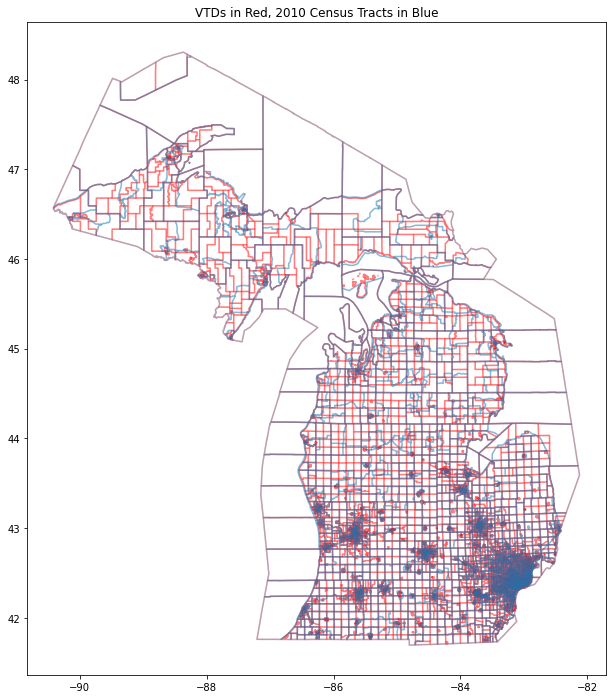

In [16]:
fig, ax = plt.subplots()
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
    # For some reason, below line prints deprecation warning for some but not all geometries
    # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
    vtds.boundary.plot(color="red",alpha=0.3,ax=ax)
    tracts.boundary.plot(alpha=0.3,ax=ax)
plt.title('VTDs in Red, 2018 Census Tracts in Blue')
plt.show()